In [48]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [49]:
#Import the dataset
fifa_df = pd.read_csv('./sport/fifa_world_cup.csv')

In [50]:
pd.set_option('display.max_columns', None)
fifa_df.head()


,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,1,Friendly,Maceió,Brazil,False,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,0,FIFA World Cup qualification,Quito,Ecuador,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,0,Friendly,Conakry,Guinea,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
fifa_df.index

RangeIndex(start=0, stop=23921, step=1)

# Is there really such a thing as a home-team advantage?

In [102]:
# Total home team games
total_game = fifa_df.groupby(['home_team']).size()
total_game = total_game.sum()
total_game

23921

In [52]:
#Count each team's total home game
home_team = fifa_df.groupby(['home_team']).size()
home_team

home_team
Afghanistan        36
Albania           131
Algeria           159
American Samoa     17
Andorra            97
                 ... 
Vietnam           120
Wales             129
Yemen              87
Zambia            180
Zimbabwe          135
Length: 211, dtype: int64

In [53]:
#Count each team's total away game
away_team = fifa_df.groupby(['away_team']).size()
away_team

away_team
Afghanistan        65
Albania           114
Algeria           137
American Samoa     14
Andorra            92
                 ... 
Vietnam            87
Wales             110
Yemen             101
Zambia            243
Zimbabwe          179
Length: 211, dtype: int64

In [54]:
#Count the win home team
win_home_team = fifa_df.loc[fifa_df['home_team_result'] == 'Win']
most_win_home_team = win_home_team['home_team'].value_counts()
most_win_home_team.sort_values(ascending=False)
most_win_home_team


USA                         194
Mexico                      190
Brazil                      181
Saudi Arabia                164
Egypt                       163
                           ... 
Cook Islands                  2
Turks and Caicos Islands      2
US Virgin Islands             2
Anguilla                      1
San Marino                    1
Name: home_team, Length: 211, dtype: int64

In [55]:
#Count home_team_result = Lose means away team won the game
win_away_team = fifa_df.loc[fifa_df['home_team_result'] == 'Lose']
most_win_away_team = win_away_team['away_team'].value_counts()
most_win_away_team.sort_values(ascending=False)
most_win_away_team

Brazil                   120
Spain                    101
Germany                  101
Zambia                    88
Argentina                 86
                        ... 
Timor-Leste                1
Anguilla                   1
American Samoa             1
São Tomé and Príncipe      1
Andorra                    1
Name: away_team, Length: 209, dtype: int64

In [56]:
#each top 10 home_team's winrate
home_winrate = (most_win_home_team/home_team)*100
home_winrate = home_winrate.sort_values(ascending=False).head(10)
home_winrate_df = pd.DataFrame(home_winrate)
home_winrate_df = home_winrate_df.reset_index()
home_winrate_df = home_winrate_df.rename(columns={'index':'home_team',0:'winrate'})

home_winrate_df = home_winrate_df.head(10)
home_winrate_df

,home_team,winrate
0,Brazil,77.682403
1,Spain,76.719577
2,Egypt,71.806167
3,IR Iran,69.633508
4,Argentina,68.421053
5,Portugal,66.847826
6,Australia,66.272189
7,France,65.610860
8,Czech Republic,65.359477
9,Senegal,65.333333


In [57]:
away_winrate = (most_win_away_team/away_team)*100
away_winrate = away_winrate.sort_values(ascending=False).head(10)
away_winrate_df = pd.DataFrame(away_winrate)
away_winrate_df = away_winrate_df.reset_index()
away_winrate_df = away_winrate_df.rename(columns={'index':'away_team',0:'winrate'})

away_winrate_df = away_winrate_df.head(10)
away_winrate_df


,away_team,winrate
0,Spain,61.212121
1,Brazil,60.000000
2,Germany,59.064327
3,France,57.046980
4,Netherlands,55.405405
5,England,51.428571
6,Japan,50.344828
7,Italy,49.342105
8,Portugal,49.342105
9,Argentina,48.587571


Brazil                   120
Spain                    101
Germany                  101
Zambia                    88
Argentina                 86
                        ... 
Timor-Leste                1
Anguilla                   1
American Samoa             1
São Tomé and Príncipe      1
Andorra                    1
Name: away_team, Length: 209, dtype: int64

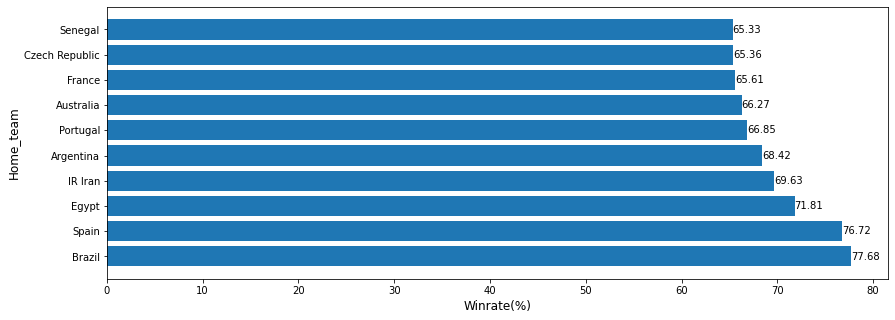

In [58]:
fig, ax = plt.subplots(figsize=(14,5))
g=plt.barh(home_winrate_df['home_team'],home_winrate_df['winrate'])
plt.ylabel('Home_team',fontsize=12)
plt.xlabel('Winrate(%)',fontsize=12)
ax.bar_label(g, label_type="edge",fmt='%.2f')
plt.show()


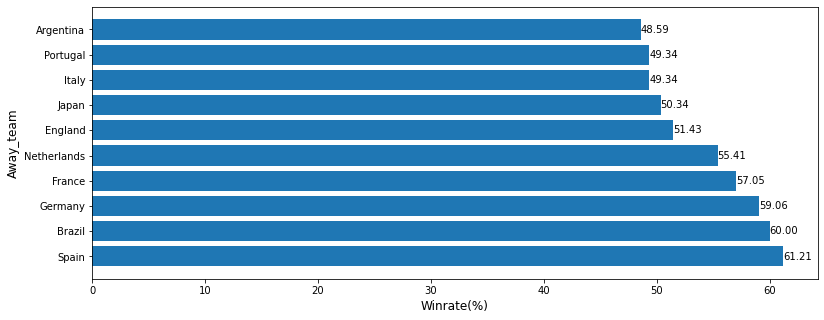

In [59]:
fig, ax = plt.subplots(figsize=(13,5))
g=plt.barh(away_winrate_df['away_team'],away_winrate_df['winrate'])
plt.ylabel('Away_team',fontsize=12)
plt.xlabel('Winrate(%)',fontsize=12)

ax.bar_label(g, label_type="edge",fmt='%.2f')

plt.show()


In [60]:
#Total wins of home game
total_win_home = most_win_home_team.sum()
total_win_home

11761

In [61]:
#Totaal wins of away game
total_win_away = most_win_away_team.sum()
total_win_away

6771

In [62]:
total_home_winrate = (total_win_home/total_game)*100
total_home_winrate

49.166004765687056

In [63]:
total_away_winrate = (total_win_away/total_game)*100
total_away_winrate


28.305672839764224

In [64]:
winrate = {'home_team':total_home_winrate,'away_team':total_away_winrate}
winrate_df = pd.DataFrame(data=winrate,index = [0])
winrate_df

,home_team,away_team
0,49.166005,28.305673


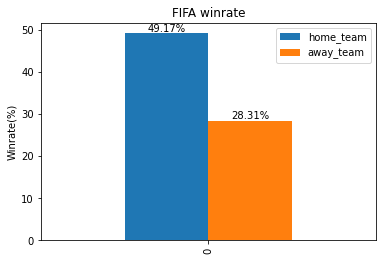

In [124]:

winrate_df.plot(kind='bar')

plt.title("FIFA winrate")
plt.ylabel('Winrate(%)')
plt.bar_label(p1.containers[0], label_type='edge', fmt='%.2f%%')
plt.bar_label(p1.containers[1], label_type='edge', fmt='%.2f%%')
plt.show()

In [76]:
#Count total win home game by continent
win_home_team_con = fifa_df.loc[fifa_df['home_team_result'] == 'Win']
most_win_home_team_con = win_home_team_con['home_team_continent'].value_counts()
most_win_home_team_con.sort_values(ascending=False)
most_win_home_team_con

Europe           3517
Africa           2942
Asia             2585
North America    1369
South America    1062
Oceania           286
Name: home_team_continent, dtype: int64

In [77]:
#Count total win away games by continent
win_away_team_con = fifa_df.loc[fifa_df['home_team_result'] == 'Lose']
most_win_away_team_con = win_away_team_con['away_team_continent'].value_counts()
most_win_away_team_con.sort_values(ascending=False)
most_win_away_team_con

Europe           2435
Africa           1513
Asia             1286
North America     700
South America     657
Oceania           180
Name: away_team_continent, dtype: int64

In [106]:
#Count total games by city
tournament = fifa_df['city'].value_counts().reset_index(name='counts')

tournament


,index,counts
0,Doha,397
1,Bangkok,215
2,Muscat,212
3,Kuwait City,202
4,Abu Dhabi,191
...,...,...
1571,Dunedin,1
1572,Manisa,1
1573,Mondercange,1
1574,Veracruz,1


In [8]:
#Brazil total away games
BR = fifa_df.loc[fifa_df['away_team'] == 'Brazil']
BR_away_game = BR.groupby(['away_team']).size()
BR_away_game

away_team
Brazil    200
dtype: int64

In [113]:
#total scores from home team
home_score = fifa_df.groupby('home_team')['home_team_score'].sum()
home_score = home_score.sum()
home_score

38494

In [114]:
#total scores from away team
away_score = fifa_df.groupby('away_team')['away_team_score'].sum()
away_score = away_score.sum()
away_score

25554

In [119]:
#create a score dataframe
score_df = pd.DataFrame({'home_score':home_score,'away_score':away_score},index=[0])
score_df

,home_score,away_score
0,38494,25554


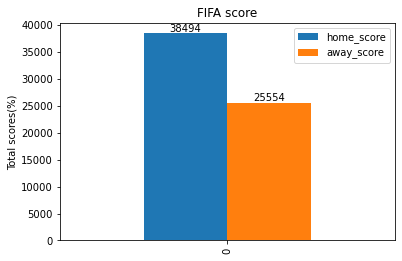

In [144]:

p1=score_df.plot(kind='bar')

plt.title("FIFA score")
plt.ylabel('Total scores(%)')
plt.bar_label(p1.containers[0], fmt='%d')
plt.bar_label(p1.containers[1], fmt='%d')
plt.show()